In [1]:
from collections import Counter
import nltk
from pathlib import Path
import pickle
import re
import string
from typing import List

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

from src import utils

ROOT_DIR = utils.get_project_root()
DATA_DIR = Path.joinpath(ROOT_DIR, 'data')
DATA_RAW_DIR = Path.joinpath(DATA_DIR, 'raw/cs-410')
INTERMEDATE_DATA_DIR = Path.joinpath(DATA_DIR, 'intermediate')

[nltk_data] Downloading package punkt to /home/bxjxrx7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bxjxrx7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Punctuation used in string module

In [2]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
# with open(Path.joinpath(INTERMEDATE_DATA_DIR, 'transcripts.pkl'), 'rb') as f:
#         transcripts = pickle.load(f)

# all_segments = [] 
# for transcript_segments in transcripts.values():
#         all_segments.extend(transcript_segments)
# vocab = Vocabulary(all_segments, remove_stop_words=True, combine_ngrams=False, stem_words=False)

### Load processed transcripts and add text to list

In [4]:
with open(Path.joinpath(INTERMEDATE_DATA_DIR, 'transcripts.pkl'), 'rb') as f:
        transcripts = pickle.load(f)

all_text = [] 

for transcript_segments in transcripts.values():
    for segment in transcript_segments:
        all_text.append(segment.text)
all_text = ' '.join(all_text).lower().split('.')

In [5]:
token_list = []
for sentence in all_text:
    sentence = sentence.strip().translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    sentence = re.sub(r"\b\d+[s]{0,1}\b", 'NUMBER', sentence)                        # replace numbers with this token
    
    # tokenize sentence
    tokens = nltk.word_tokenize(sentence)
    tokens = [word for word in tokens if word not in stop_words]
    token_list.append(tokens)

token_list[:3]

[['sound', 'lecture', 'natural', 'language', 'content', 'analysis'],
 ['natural',
  'language',
  'content',
  'analysis',
  'foundation',
  'text',
  'mining'],
 ['going', 'first', 'talk']]

## Count Most Common N-Grams

In [6]:
def count_n_grams(tokenized_sentences: List[List[str]], n: int) -> Counter:
    '''
    count all n-grams in TIS corpus

    Input:
        - tokenized_sentences: List[List[str]] - list of tokenized sentences
        - n: int - size of n-gram
    
    Return: Counter - count of all n-grams
    '''
    # enumerate all n-grams
    n_grams_list = []
    for tokens in tokenized_sentences:
        n_grams_list.append(list(nltk.ngrams(tokens, n, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>')))

    # combine n-grams with '_' and count
    merged_n_grams = []
    for sentence in n_grams_list:
        for n_gram in sentence:
            s ='_'.join(n_gram)
            if '<s>' not in s and '</s>' not in s:
                merged_n_grams.append(s)

    return Counter(merged_n_grams)

### Most Common 4-Grams

In [7]:
count_4_grams = count_n_grams(token_list, n=4)
count_4_grams.most_common(100)

[('use_maximum_likelihood_estimator', 9),
 ('natural_language_processing_techniques', 8),
 ('simplest_vector_space_model', 8),
 ('like_vector_space_model', 8),
 ('lecture_going_continue_discussing', 8),
 ('opinion_mining_sentiment_analysis', 7),
 ('lecture_going_continue_talking', 7),
 ('query_vector_document_vector', 6),
 ('lecture_going_continue_discussion', 6),
 ('natural_language_content_analysis', 5),
 ('text_retrieval_text_mining', 5),
 ('lecture_going_talk_text', 5),
 ('distribution_used_generate_document', 5),
 ('take_away_probability_mass', 5),
 ('natural_language_processing_difficult', 4),
 ('matching_one_frequent_term', 4),
 ('next_lecture_going_talk', 4),
 ('text_data_actionable_knowledge', 4),
 ('nontext_data_text_data', 4),
 ('discussion_vector_space_model', 4),
 ('unique_query_terms_matched', 4),
 ('query_terms_matched_document', 4),
 ('instantiate_vector_space_model', 4),
 ('weighting_document_length_normalization', 4),
 ('lets_take_look_specific', 4),
 ('talked_push_ve

### Most Common Tri-Grams

In [8]:
count_3_grams = count_n_grams(token_list, n=3)
count_3_grams.most_common(200)

[('vector_space_model', 81),
 ('natural_language_processing', 32),
 ('lets_take_look', 31),
 ('would_allow_us', 31),
 ('would_give_us', 30),
 ('maximum_likelihood_estimate', 26),
 ('lecture_going_talk', 25),
 ('background_language_model', 22),
 ('lecture_going_continue', 21),
 ('maximum_likelihood_estimator', 19),
 ('many_different_ways', 17),
 ('distribution_used_generate', 17),
 ('contextual_text_mining', 16),
 ('would_look_like', 12),
 ('particular_going_talk', 12),
 ('collection_language_model', 12),
 ('sum_query_words', 12),
 ('topic_mining_analysis', 11),
 ('use_maximum_likelihood', 11),
 ('unigram_language_model', 11),
 ('topic_word_distribution', 11),
 ('would_help_us', 10),
 ('lets_first_look', 10),
 ('count_word_document', 10),
 ('lecture_continue_discussion', 10),
 ('system_b_better', 10),
 ('documents_match_term', 9),
 ('lot_text_data', 9),
 ('gives_us_probability', 9),
 ('NUMBER_NUMBER_NUMBER', 9),
 ('document_language_model', 9),
 ('probability_word_given', 9),
 ('unigram

### Most Common Bi-Grams

In [9]:
count_2_grams = count_n_grams(token_list, n=2)
count_2_grams.most_common(200)

[('text_data', 229),
 ('language_model', 111),
 ('text_mining', 106),
 ('vector_space', 97),
 ('space_model', 82),
 ('text_retrieval', 81),
 ('going_talk', 80),
 ('word_distribution', 74),
 ('NUMBER_NUMBER', 73),
 ('help_us', 71),
 ('relevant_documents', 67),
 ('lecture_going', 66),
 ('search_engine', 65),
 ('give_us', 61),
 ('lets_say', 60),
 ('solve_problem', 59),
 ('natural_language', 58),
 ('mixture_model', 57),
 ('theta_sub', 57),
 ('different_ways', 56),
 ('likelihood_function', 54),
 ('maximum_likelihood', 53),
 ('take_look', 52),
 ('allow_us', 52),
 ('ranking_function', 52),
 ('training_data', 51),
 ('probability_word', 49),
 ('lets_look', 47),
 ('topic_model', 46),
 ('text_categorization', 46),
 ('would_allow', 45),
 ('sound_lecture', 44),
 ('would_like', 44),
 ('going_use', 44),
 ('gives_us', 43),
 ('search_engines', 43),
 ('machine_learning', 41),
 ('allows_us', 41),
 ('looks_like', 40),
 ('time_series', 40),
 ('would_give', 39),
 ('inverted_index', 38),
 ('also_see', 37),
 

### Create vocabulary set from tokens

In [10]:
vocab = set()
for tokens in token_list:
    vocab.update(tokens)
vocab = sorted(list(vocab))
vocab[:10]

['1k',
 '32bits',
 '8bits',
 'NUMBER',
 'aa',
 'aand',
 'ab',
 'ability',
 'able',
 'abortion']

### Vocabulary Size

In [11]:
len(vocab)

4652

### Porter Stemmer

In [12]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
vocab_stemmed = sorted(list(set(stemmer.stem(word) for word in vocab)))
vocab_stemmed[:10]

['1k', '32bit', '8bit', 'aa', 'aand', 'ab', 'abil', 'abl', 'abort', 'abound']

### Size of stemmed vocabulary

In [13]:
len(vocab_stemmed)

2855

### Effects of Porter Stemmer

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokens = ['probability', 'probabilistic', 'vector', 'vectors', 'word', 'words', 'computer', 'computation', 'computational']
tokens_stemmed = [stemmer.stem(word) for word in tokens]
for word, stem in zip(tokens, tokens_stemmed):
    print(word, '-', stem)

probability - probabl
probabilistic - probabilist
vector - vector
vectors - vector
word - word
words - word
computer - comput
computation - comput
computational - comput


### Word Cloud

In [15]:
words = []
for segment in token_list:
    sentence = ' '.join(segment)
    for ngram in utils.common_n_grams:
        sentence = sentence.replace(ngram, ngram.replace(' ', '_'))
    words.extend(sentence.split(' '))

word_counter = Counter(words)

In [16]:
word_counter.most_common(1000)

[('would', 997),
 ('also', 893),
 ('one', 759),
 ('document', 724),
 ('words', 708),
 ('text', 706),
 ('see', 705),
 ('NUMBER', 682),
 ('word', 681),
 ('data', 677),
 ('probability', 624),
 ('going', 608),
 ('model', 592),
 ('two', 574),
 ('well', 537),
 ('different', 502),
 ('use', 496),
 ('documents', 485),
 ('case', 473),
 ('topic', 466),
 ('example', 425),
 ('thats', 416),
 ('function', 410),
 ('general', 386),
 ('problem', 383),
 ('like', 379),
 ('query', 379),
 ('actually', 375),
 ('look', 372),
 ('us', 365),
 ('might', 342),
 ('first', 327),
 ('course', 308),
 ('many', 295),
 ('topics', 295),
 ('user', 293),
 ('distribution', 290),
 ('think', 287),
 ('lets', 273),
 ('right', 267),
 ('want', 253),
 ('using', 246),
 ('basically', 243),
 ('another', 242),
 ('way', 237),
 ('lecture', 236),
 ('lot', 231),
 ('information', 227),
 ('context', 226),
 ('means', 224),
 ('know', 219),
 ('based', 219),
 ('value', 217),
 ('particular', 216),
 ('take', 215),
 ('make', 213),
 ('system', 213),


In [17]:
common_single_words = set([
    'words',
    'documents',
    'text',
    'function',
    'topics',
    'information',
    'parameters',
    'probability',
    'analysis',
    'clustering',
    'distributions',
    'precision',
    'algorithm',
    'opinion',
    'rank',
    'rating',
    'matching',
    'idf',
    'tf',
    'frequency',
    'sentence',
    'data'
])

In [18]:
word_freqs = dict()

for w, f in word_counter.most_common(1000):
    if '_' in w:
        word_freqs[w.replace('_', ' ')] = f 
    elif w == 'tf' or w == 'idf':
         word_freqs[w.upper()] = f
    elif w in common_single_words:
        word_freqs[w] = f

In [19]:
word_freqs

{'words': 708,
 'text': 706,
 'data': 677,
 'probability': 624,
 'documents': 485,
 'function': 410,
 'topics': 295,
 'information': 227,
 'parameters': 193,
 'analysis': 156,
 'clustering': 133,
 'distributions': 91,
 'text mining': 90,
 'sentence': 89,
 'algorithm': 86,
 'opinion': 84,
 'text retrieval': 81,
 'vector space model': 81,
 'rank': 78,
 'frequency': 76,
 'rating': 74,
 'matching': 73,
 'relevant documents': 67,
 'search engine': 63,
 'IDF': 57,
 'precision': 56,
 'maximum likelihood': 53,
 'machine learning': 41,
 'search engines': 40,
 'time series': 40,
 'data mining': 33,
 'TF': 33,
 'query words': 33,
 'query likelihood': 33,
 'mutual information': 33,
 'conditional entropy': 33,
 'natural language processing': 32,
 'precision recall': 32,
 'words document': 31,
 'similarity function': 30,
 'information retrieval': 29,
 'background model': 29,
 'relevant document': 27,
 'web search': 24,
 'background language model': 22,
 'opinion mining': 16,
 'vector space': 16,
 'c

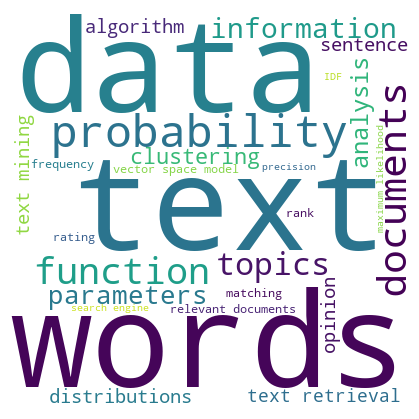

In [21]:
# plotting code adapted from 
# https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud
import matplotlib.pyplot as plt 


wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(word_freqs)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()